In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def rmatrix(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        helper = np.random.rand()
        if helper>=prob:
            random_weight = 1
        else:
            random_weight = 0
        gr1.edges[u,v]['weight'] = random_weight
    old_adj = nx.adjacency_matrix(gr1)
    adj = nx.adjacency_matrix(gr1)
    gr = nx.from_numpy_matrix(adj.todense())
    c_dict = nx.eigenvector_centrality(gr)
    largest = max(c_dict.values())
    def which_node(some_dict):
                for key, value in some_dict.items():
                    if value == largest:
                        the_key = key
                return the_key
    def cut_and_replace(mat,prob = 0.2):
        node = which_node(c_dict)
        rows = mat.shape[0]
        cols = mat.shape[1]
        for x in range(0, cols - 1):
            for y in range(0, rows -1):
                if x == node or y == node: ## we're at the relevant node
                    if mat[x,y] == 0: # no connection before
                        random_ = np.random.randn()
                        if random_ >=prob and x!=y:
                            mat[x,y] += 1 # connection pwith probalility prob
                    else:
                        mat[x,y] == 0 # cut it
        return mat
                    
    return cut_and_replace(adj.todense()), old_adj.todense()

before, after = rmatrix(0.5,15)

In [41]:
num_triangles_before = []
num_triangles_after = []
max_eigs_before = []
max_eigs_after = []

counter = 0
while counter <=99:
    before, after = rmatrix(0.5,15)
    g = nx.from_numpy_matrix(before)
    g_ = nx.from_numpy_matrix(after)
    
    triangles_before = sum(nx.triangles(g).values())
    triangles_after = sum(nx.triangles(g_).values())
    num_triangles_before.append(triangles_before)
    num_triangles_after.append(triangles_after)
    
    max_eig_before = max(np.linalg.eigvals(before))
    max_eig_after = max(np.linalg.eigvals(after))
    max_eigs_before.append(max_eig_before)
    max_eigs_after.append(max_eig_after)
    
    counter+=1
    
rolling_triangles_before = [np.mean(num_triangles_before[:i]) for i in range(len(num_triangles_before))]
rolling_triangles_after = [np.mean(num_triangles_after[:i]) for i in range(len(num_triangles_after))]

rolling_eigs_before = [np.mean(max_eigs_before[:i]) for i in range(len(max_eigs_before))]
rolling_eigs_after = [np.mean(max_eigs_after[:i]) for i in range(len(max_eigs_after))]


Over time, the number of triangles for the original adjecency matrix(blue), and the new one evolved in this way(rolling averages are presented). Doing the modification seems to remove around 30 triangles

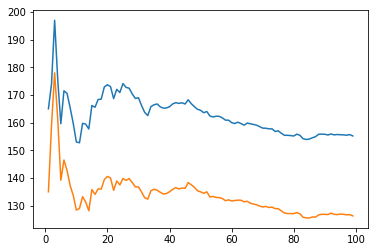

In [42]:
import seaborn as sns
sns.lineplot(data = np.asarray(rolling_triangles_before))
sns.lineplot(data = np.asarray(rolling_triangles_after))

We observe similar effect for the maximum eigenvalue, the operation diminishes it by around 0.4

C:\Users\Jakub\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Jakub\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


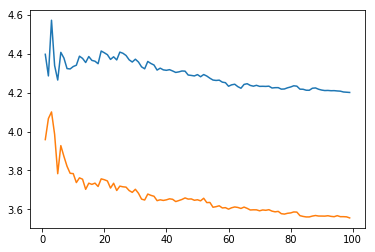

In [43]:
sns.lineplot(data = np.asarray(rolling_eigs_before))
sns.lineplot(data = np.asarray(rolling_eigs_after))

### Part B

The code above needs to be modified to repeat the procedure more than 2 times:

In [65]:
def rmatrix(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        helper = np.random.rand()
        if helper>=prob:
            random_weight = 1
        else:
            random_weight = 0
        gr1.edges[u,v]['weight'] = random_weight
    old_adj = nx.adjacency_matrix(gr1)
    adj = nx.adjacency_matrix(gr1)
    gr = nx.from_numpy_matrix(adj.todense())
    c_dict = nx.eigenvector_centrality(gr)
    largest = max(c_dict.values())
    def which_node(some_dict):
                for key, value in some_dict.items():
                    if value == largest:
                        the_key = key
                return the_key
    def cut_and_replace(mat,prob = 0.2):
        node = which_node(c_dict)
        rows = mat.shape[0]
        cols = mat.shape[1]
        for x in range(0, cols - 1):
            for y in range(0, rows -1):
                if x == node or y == node: ## we're at the relevant node
                    if mat[x,y] == 0: # no connection before
                        random_ = np.random.randn()
                        if random_ >=prob and x!=y:
                            mat[x,y] += 1 # connection pwith probalility prob
                    else:
                        mat[x,y] == 0 # cut it
        return mat
                    
    s1 = old_adj.todense()
    s2 = cut_and_replace(adj.todense())
    s3 = cut_and_replace(s2)
    s4 = cut_and_replace(s3)
    s8 = cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(s4))))
    s15 = cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(cut_and_replace(s8))))))))
    return s1, s2, s3,s4, s8, s15

st1, st2, st3, st4, st8, st15 = rmatrix(0.5,15)

This replaces disbalances in the network(the best connected nodes) by a set of random connections - i.e. normalizes the distribution.
First stage:

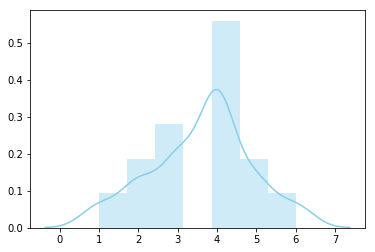

In [58]:
st1_out = np.diag(np.dot(st1, np.transpose(st1)))

sns.distplot(st1_out  , color="skyblue")

Stage 2

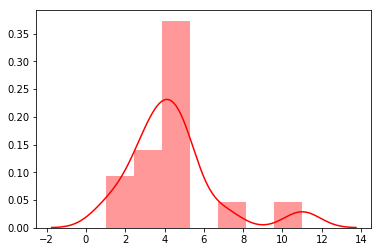

In [59]:
st2_out = np.diag(np.dot(st2, np.transpose(st2)))

sns.distplot(st2_out  , color="red")

Stage 3

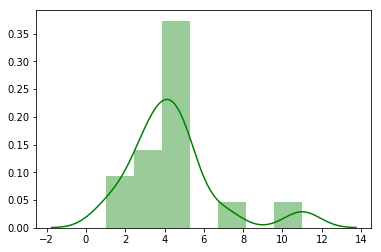

In [60]:
st3_out = np.diag(np.dot(st3, np.transpose(st3)))

sns.distplot(st3_out  , color="green")

Stage 8:

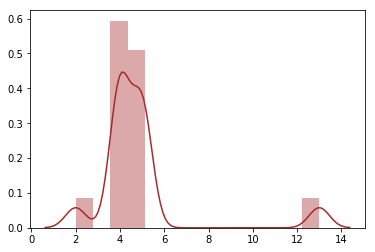

In [64]:
st8_out = np.diag(np.dot(st8, np.transpose(st8)))
sns.distplot(st8_out  , color="brown")

Stage 15: after 15 iterations, we see clearly that the varianvce of the distribution sis decreasing, as expected

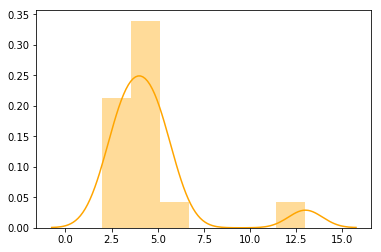

In [67]:
st15_out = np.diag(np.dot(st15, np.transpose(st15)))
sns.distplot(st15_out  , color="orange")